<a href="https://colab.research.google.com/github/zhuan0122/Machine_Learing_Handson_Python_in_Data_science/blob/master/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


## Importing the dataset

In [19]:
# in clustering there is no dependent variables because we use all features for find patterns and clusters for these data.
# we have no idea what we want to cluster and for visulising purpose, we only use two features here because one feature is one axis
# and if we plot 3D 4D which is quite hard to visulize so we just keep two feature here for visulization 
dataset=pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[:,[3,4]].values
#print(X)

## Using the elbow method to find the optimal number of clusters

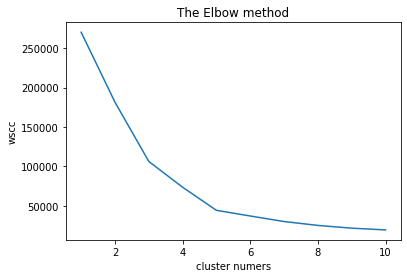

In [20]:
from sklearn.cluster import KMeans
wcss = []
# range starts default to zero and not include the stop
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('cluster numers')
plt.ylabel('wscc')
plt.show()
# so we find the optimal number of cluster is five since after five the gradient is decreasing quite slow 

## Training the K-Means model on the dataset

In [21]:
# so we choose K as 5 to traing and predict the K means model on the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)
print(y_kmeans)
# so if you change the random_state here to be different value, then we will have differengt result here

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [28]:
# when we call the contributes of the object, it will not have bracket 
kmeans.cluster_centers_


array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

## Visualising the clusters

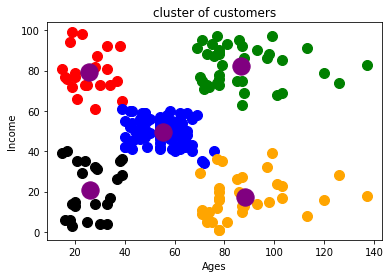

In [32]:
#what we want plot is plot data into different cluster
# s is the size of the scatter point
# use == to select all points with y_kmeans equal to corresponding cluster group
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='black',label='cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='orange',label='cluster 5')
# we plot the cluster_centers_ above and it shows a metric, the first culomn is the center position(x), the second culomn is position y
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='purple',label='centeriod')
plt.title('cluster of customers')
plt.xlabel('Ages')
plt.ylabel('Income')
plt.show()
